In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
#define normalised light curve function for each passband 

In [4]:
from core import *

def create_light_curve(o,s,center,width):
    lc = array([(o[i,:,center-width:center+width]-s[i,:,newaxis]).mean(1) for i in range(o.shape[0])])
    return lc/median(lc)

gain = pf.getval(l_obj[0], 'gain')
b1 = np.load(join(reddir,'bias_y.npz'))['ccd1_denoised']
b2 = np.load(join(reddir,'bias_y.npz'))['ccd2_denoised']

f1 = np.load(join(reddir,'masterflats.npz'))['flat_ccd1'] - b1[:,newaxis]
f2 = np.load(join(reddir,'masterflats.npz'))['flat_ccd2'] - b2[:,newaxis]

In [5]:
#??

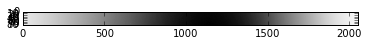

In [6]:
imshow(f1[ccd1_window].T, vmin=0, cmap=cm.gray_r)

# Create the comparison light curve

In [7]:
#correct data for ccd bias

In [37]:
dco1 = gain*(pf.getdata('data/cube_o1.fits').astype(np.float64) - b1[newaxis,:,newaxis])
dcs1 = gain*(pf.getdata('data/cube_s1.fits').astype(np.float64) - b1[newaxis,:,newaxis])

In [9]:
#f1o=f1[:,245:350]
#f1o = array([f1o,]*651)
#dco1=dco1/f1o

In [10]:
#f1s=f1[:,370:450]
#f1s = array([f1s,]*651)
#dcs1=dcs1/f1s

In [38]:
sky1  = dcs1.mean(-1)
flux1 = create_light_curve(dco1,sky1,center=40,width=25)

In [39]:
pf.writeto(join(reddir,'spectra_1.fits'), flux1, clobber=True)

## Create the target light curve

In [13]:
#correct data for ccd bias

In [34]:
dco2 = gain*(pf.getdata('data/cube_o2.fits').astype(np.float64) - b2[newaxis,:,newaxis])
dcs2 = gain*(pf.getdata('data/cube_s2.fits').astype(np.float64) - b2[newaxis,:,newaxis])

In [15]:
#f2o=f2[:,840:895]
#f2o = array([f2o,]*651)
#dco2=dco2/f2o

In [16]:
#f2s=f2[:,770:810]
#f2s= array([f2s,]*651)
#dcs2=dcs2/f2s

In [35]:
sky2 = dcs2.mean(-1)
flux2 = create_light_curve(dco2,sky2,center=24,width=15)

In [36]:
pf.writeto(join(reddir,'spectra_2.fits'), flux2, clobber=True)

In [19]:
#light curves for comparision and target stars - mean of broadband light

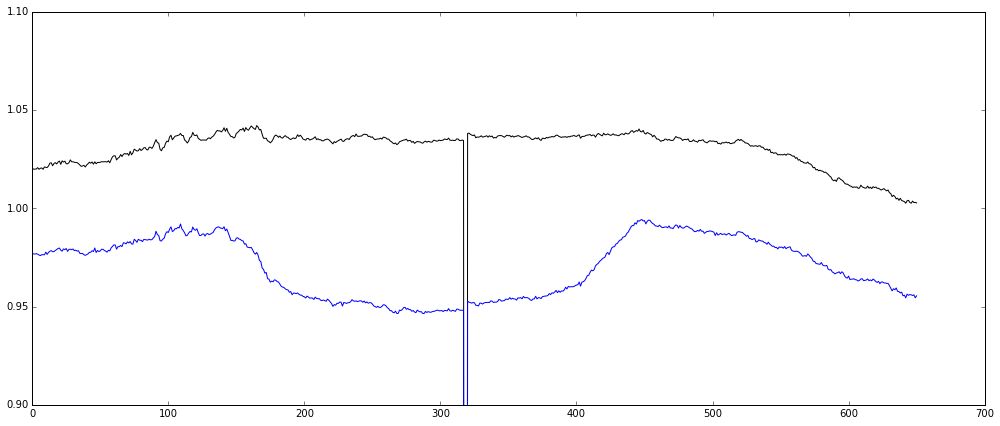

In [42]:
fig,ax = subplots(1,1,figsize=(14,6))
plot(flux1.mean(1)+0.05,'k')
plot(flux2.mean(1),'b')
ylim(0.9,1.1)
fig.tight_layout()

In [27]:
#?
#average standard deviation for different wavelengths over total time 

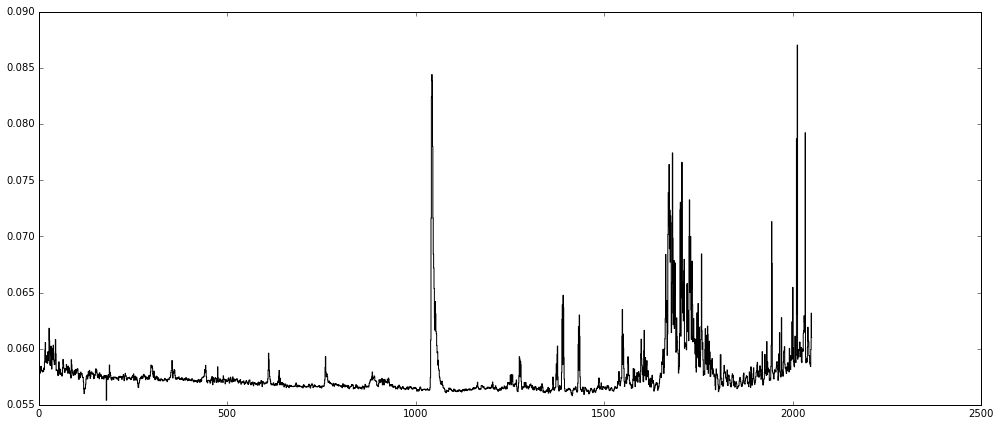

In [43]:
fig,ax = subplots(1,1,figsize=(14,6))
#plot(flux1.mean(0), 'k', drawstyle='steps-mid')
plot(flux1.std(0)/flux1.mean(0), 'k', drawstyle='steps-mid')
#xlim(1020,1100)
fig.tight_layout()

In [29]:
#Target light curve / comaparison light curve

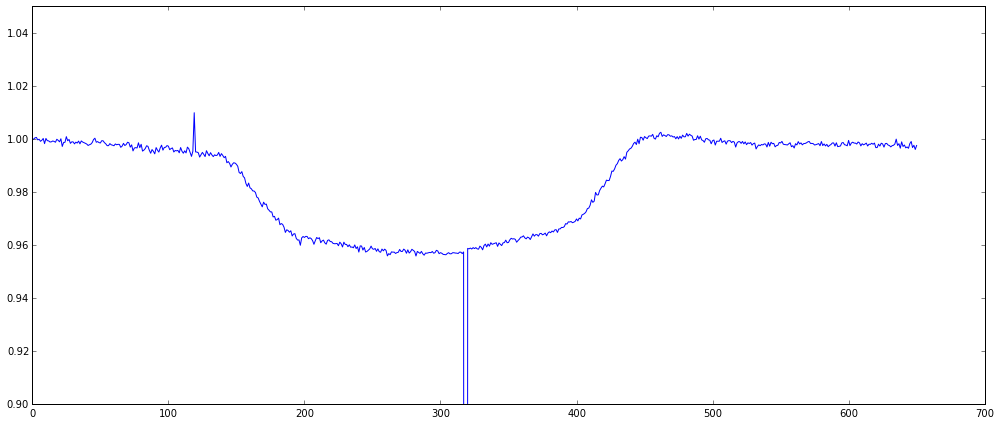

In [45]:
fig,ax = subplots(1,1,figsize=(14,6))
plot((flux2/flux1).mean(1))
ylim(0.9,1.05)
fig.tight_layout()

In [46]:
#Target light curve / comaparison light curve  for two wavelength bands

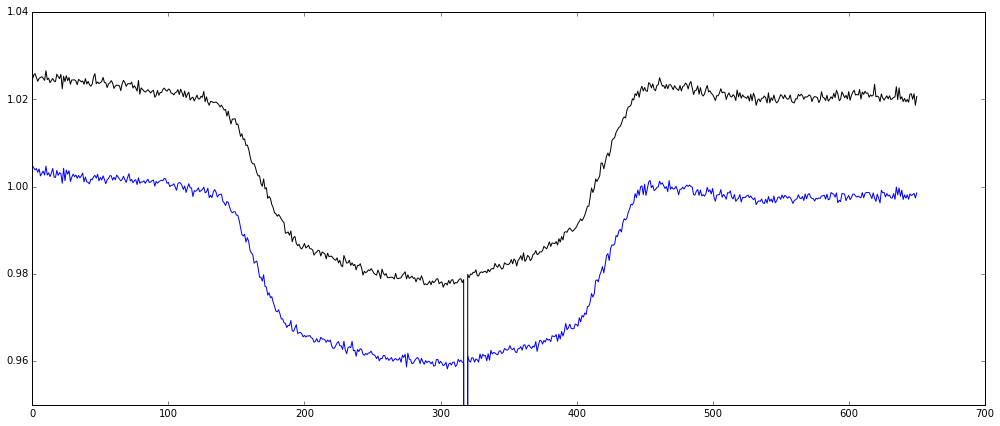

In [47]:
fig,ax = subplots(1,1,figsize=(14,6))
plot(flux2[:,500:700].mean(1)/flux1[:,500:700].mean(1)/1.03, 'k')
plot(flux2[:,1100:1300].mean(1)/flux1[:,1100:1300].mean(1)/1.01)
ylim(0.95,1.04)
fig.tight_layout()